In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWar

(array(['mutated', 'nan'], dtype=object), array([22790, 17813]))


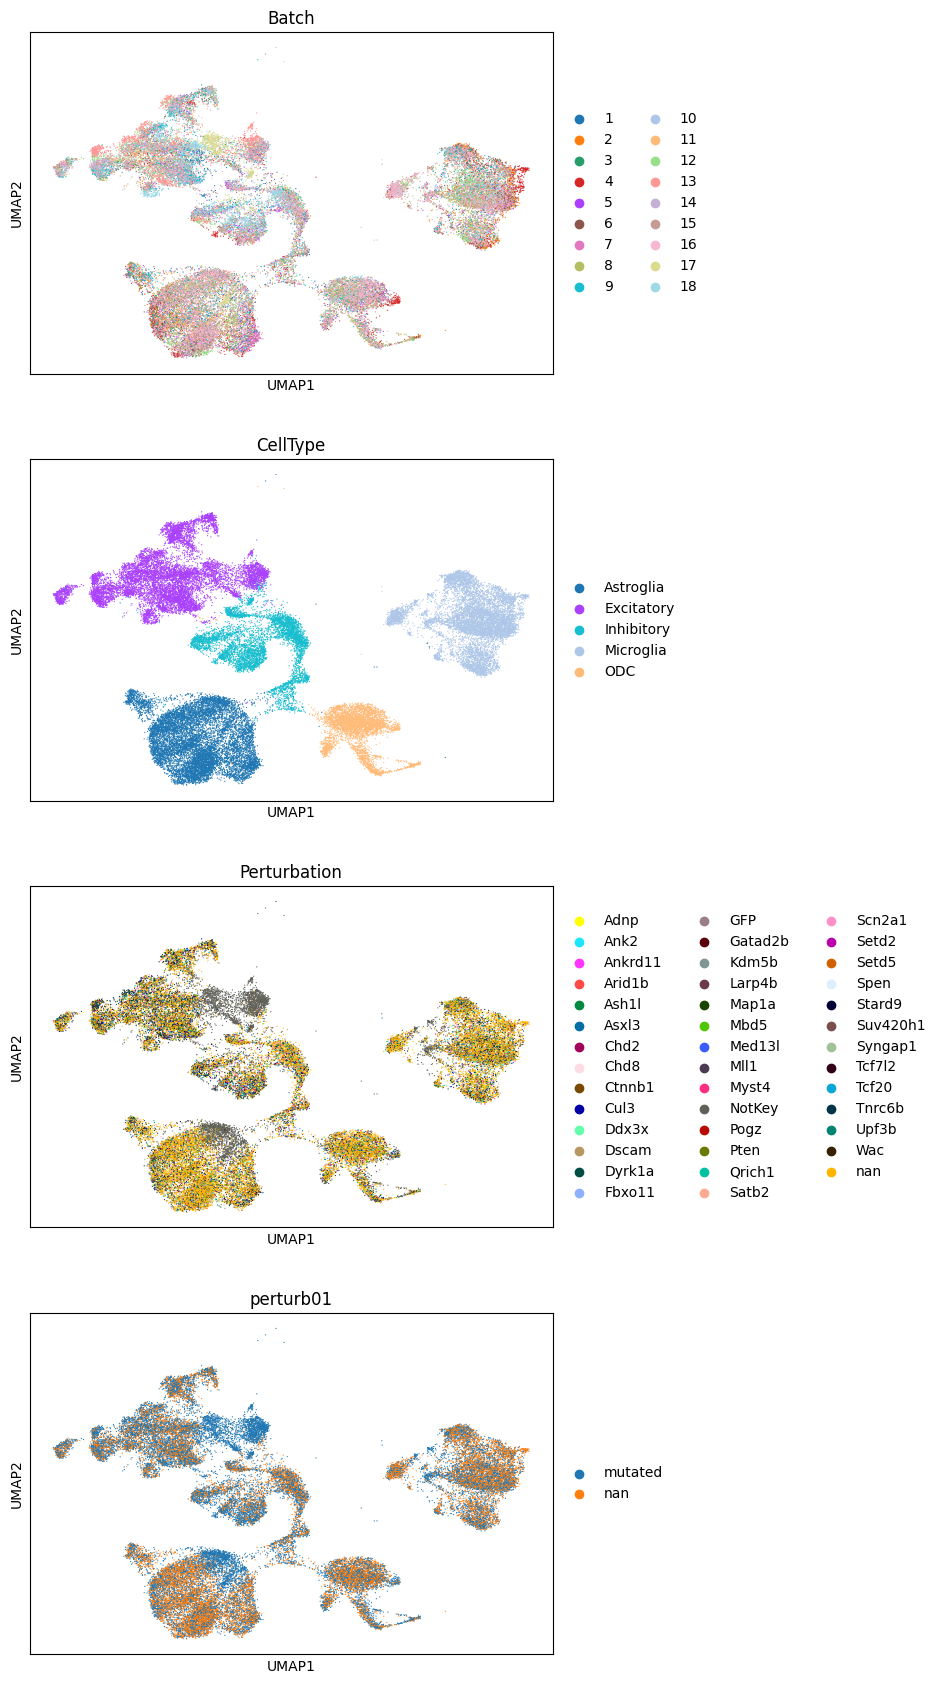

  (5, 3)	7.2946487766577
  (8, 5)	5.09259798962601
  (9, 5)	5.73818938367529
AnnData object with n_obs × n_vars = 40603 × 2000
    obs: 'nGene', 'nUMI', 'Cluster', 'Batch', 'CellType', 'Perturbation', 'isKey', 'isAnalysed', 'SCRUBLET', 'perturb01'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'CellType_colors', 'Perturbation_colors', 'hvg', 'neighbors', 'pca', 'perturb01_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [2]:
adata=sc.read_h5ad("../data/ASD1.h5ad")
print(np.unique(adata.obs["perturb01"],return_counts=True))
adata.raw=None
sc.pl.umap(adata,color=["Batch","CellType","Perturbation","perturb01"],ncols=1)
print(adata.X[:10,:10])
print(adata)

In [3]:
from ndreamer import NDreamer
print(adata.shape)
model = NDreamer(adata, condition_key='Perturbation', contorl_name='nan', num_hvg=2000, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD1_nobatch/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD1_nobatch/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 

(40603, 2000)
Using device: <class 'torch.cuda.device'>
1
Start data preprocessing
Original adata.obs[Perturbation] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'nan': 0, 'Med13l': 1, 'Tnrc6b': 2, 'NotKey': 3, 'Stard9': 4, 'Asxl3': 5, 'Mbd5': 6, 'Wac': 7, 'Larp4b': 8, 'Setd5': 9, 'Spen': 10, 'Scn2a1': 11, 'Kdm5b': 12, 'Setd2': 13, 'Ankrd11': 14, 'Myst4': 15, 'Fbxo11': 16, 'Ctnnb1': 17, 'Gatad2b': 18, 'Pogz': 19, 'Upf3b': 20, 'Ddx3x': 21, 'Cul3': 22, 'Syngap1': 23, 'Ash1l': 24, 'Tcf20': 25, 'Ank2': 26, 'GFP': 27, 'Qrich1': 28, 'Arid1b': 29, 'Tcf7l2': 30, 'Dscam': 31, 'Mll1': 32, 'Dyrk1a': 33, 'Chd8': 34, 'Map1a': 35, 'Adnp': 36, 'Pten': 37, 'Chd2': 38, 'Suv420h1': 39, 'Satb2': 40}
Condition mapping to adata.obs['batch']: {'batch': {0: 0}}
Unique batch mapping: {0: 0}


Calculating the clusters
Unique groups: ['0_Adnp' '0_Ank2' '0_Ankrd11' '0_Arid1b' '0_Ash1l' '0_Asxl3' '0_Chd2'
 '0_Chd8' '0_Ctnnb1' '0_Cul3' '0_Ddx3x' '0_Dscam' '0_Dyrk1a' '0_Fbxo11'
 '0_GFP' '0_Gatad2b' '0_Kdm5b' '0_Larp4b' '0_Map1a' '0_Mbd5' '0_Med13l'
 '0_Mll1' '0_Myst4' '0_NotKey' '0_Pogz' '0_Pten' '0_Qrich1' '0_Satb2'
 '0_Scn2a1' '0_Setd2' '0_Setd5' '0_Spen' '0_Stard9' '0_Suv420h1'
 '0_Syngap1' '0_Tcf20' '0_Tcf7l2' '0_Tnrc6b' '0_Upf3b' '0_Wac' '0_nan']
Mean number of cells in this dataset less than 2000, cluster using all cells instead of one group (unique batch and condition combination) by one group


Finished clustering
Data preprocessing done


Remaining number of cells: 40603
Too few epoches (steps, if rigorously speaking). Changing epoch to 15 to adjust for number of cells
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {'batch': {0: 0}}
Condition name to number mapping (may be used for search for saved adata):
 {'nan': 0, 'Med13l': 1, 'Tnrc6b': 2, 'NotKey': 3, 'Stard9': 4, 'Asxl3': 5, 'Mbd5': 6, 'Wac': 7, 'Larp4b': 8, 'Setd5': 9, 'Spen': 10, 'Scn2a1': 11, 'Kdm5b': 12, 'Setd2': 13, 'Ankrd11': 14, 'Myst4': 15, 'Fbxo11': 16, 'Ctnnb1': 17, 'Gatad2b': 18, 'Pogz': 19, 'Upf3b': 20, 'Ddx3x': 21, 'Cul3': 22, 'Syngap1': 23, 'Ash1l': 24, 'Tcf20': 25, 'Ank2': 26, 'GFP': 27, 'Qrich1': 28, 'Arid1b': 29, 'Tcf7l2': 30, 'Dscam': 31, 'Mll1': 32, 'Dyrk1a': 33, 'Chd8': 34, 'Map1a': 35, 'Adnp': 36, 'Pten': 37, 'Chd2': 38, 'Suv420h1': 39, 'Satb2': 40}
Preprocessing time: 111.50857 seconds


Overall Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Resetting 786 unused embeddings.
Resetting 771 unused embeddings.
Resetting 781 unused embeddings.


Resetting 789 unused embeddings.
Resetting 786 unused embeddings.
Resetting 794 unused embeddings.


Resetting 811 unused embeddings.
Resetting 797 unused embeddings.
Resetting 782 unused embeddings.


Resetting 795 unused embeddings.
Resetting 777 unused embeddings.
Resetting 818 unused embeddings.


Resetting 786 unused embeddings.
Resetting 801 unused embeddings.
Resetting 779 unused embeddings.


Resetting 795 unused embeddings.
Resetting 786 unused embeddings.
Resetting 818 unused embeddings.


Resetting 782 unused embeddings.
Resetting 787 unused embeddings.
Resetting 782 unused embeddings.


Resetting 782 unused embeddings.
Resetting 783 unused embeddings.
Resetting 778 unused embeddings.


Resetting 801 unused embeddings.
Resetting 757 unused embeddings.
Resetting 819 unused embeddings.


Resetting 799 unused embeddings.
Resetting 744 unused embeddings.
Resetting 805 unused embeddings.


Resetting 772 unused embeddings.
Resetting 769 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 0


Epoch: 1/15 | All Loss: 257.7783 | Neighborhood Loss: 200.8608 | Triplet Loss: 5.9615 | Reconstruction Loss: 8.9609 | Independent Loss: 41.9332 | KL Loss: 0.3816 | Commitment Loss: 0.4421 | Dependent Loss: -0.7618


Resetting 759 unused embeddings.
Resetting 769 unused embeddings.
Resetting 791 unused embeddings.


Resetting 754 unused embeddings.
Resetting 787 unused embeddings.
Resetting 742 unused embeddings.


Resetting 816 unused embeddings.
Resetting 774 unused embeddings.
Resetting 737 unused embeddings.


Resetting 760 unused embeddings.
Resetting 706 unused embeddings.
Resetting 815 unused embeddings.


Resetting 754 unused embeddings.
Resetting 787 unused embeddings.
Resetting 752 unused embeddings.


Resetting 790 unused embeddings.
Resetting 788 unused embeddings.
Resetting 815 unused embeddings.


Resetting 734 unused embeddings.
Resetting 743 unused embeddings.
Resetting 754 unused embeddings.


Resetting 774 unused embeddings.
Resetting 735 unused embeddings.
Resetting 698 unused embeddings.


Resetting 764 unused embeddings.
Resetting 738 unused embeddings.
Resetting 746 unused embeddings.


Resetting 752 unused embeddings.
Resetting 745 unused embeddings.
Resetting 781 unused embeddings.


Resetting 789 unused embeddings.
Resetting 710 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Epoch: 2/15 | All Loss: 214.7215 | Neighborhood Loss: 179.1955 | Triplet Loss: 2.3740 | Reconstruction Loss: 6.8047 | Independent Loss: 26.6221 | KL Loss: 0.1967 | Commitment Loss: 0.1854 | Dependent Loss: -0.6570


Resetting 685 unused embeddings.
Resetting 725 unused embeddings.
Resetting 762 unused embeddings.


Resetting 687 unused embeddings.
Resetting 682 unused embeddings.
Resetting 712 unused embeddings.


Resetting 766 unused embeddings.
Resetting 724 unused embeddings.
Resetting 692 unused embeddings.


Resetting 706 unused embeddings.
Resetting 674 unused embeddings.
Resetting 777 unused embeddings.


Resetting 736 unused embeddings.
Resetting 704 unused embeddings.
Resetting 728 unused embeddings.


Resetting 718 unused embeddings.
Resetting 710 unused embeddings.
Resetting 759 unused embeddings.


Resetting 678 unused embeddings.
Resetting 711 unused embeddings.
Resetting 710 unused embeddings.


Resetting 723 unused embeddings.
Resetting 681 unused embeddings.
Resetting 693 unused embeddings.


Resetting 672 unused embeddings.
Resetting 721 unused embeddings.
Resetting 687 unused embeddings.


Resetting 707 unused embeddings.
Resetting 702 unused embeddings.
Resetting 744 unused embeddings.


Resetting 719 unused embeddings.
Resetting 687 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Resetting 687 unused embeddings.
Resetting 716 unused embeddings.
Resetting 748 unused embeddings.


Resetting 677 unused embeddings.
Resetting 679 unused embeddings.
Resetting 733 unused embeddings.


Resetting 730 unused embeddings.
Resetting 725 unused embeddings.
Resetting 677 unused embeddings.


Resetting 709 unused embeddings.
Resetting 695 unused embeddings.
Resetting 769 unused embeddings.


Resetting 742 unused embeddings.
Resetting 707 unused embeddings.
Resetting 716 unused embeddings.


Resetting 723 unused embeddings.
Resetting 689 unused embeddings.
Resetting 729 unused embeddings.


Resetting 683 unused embeddings.
Resetting 706 unused embeddings.
Resetting 719 unused embeddings.


Resetting 739 unused embeddings.
Resetting 681 unused embeddings.
Resetting 714 unused embeddings.


Resetting 667 unused embeddings.
Resetting 727 unused embeddings.
Resetting 686 unused embeddings.


Resetting 686 unused embeddings.
Resetting 716 unused embeddings.
Resetting 744 unused embeddings.


Resetting 713 unused embeddings.
Resetting 693 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Epoch: 3/15 | All Loss: 200.0410 | Neighborhood Loss: 165.9652 | Triplet Loss: 1.7611 | Reconstruction Loss: 6.4229 | Independent Loss: 26.1876 | KL Loss: 0.1759 | Commitment Loss: 0.1774 | Dependent Loss: -0.6490


Resetting 683 unused embeddings.
Resetting 709 unused embeddings.
Resetting 746 unused embeddings.


Resetting 662 unused embeddings.
Resetting 651 unused embeddings.
Resetting 750 unused embeddings.


Resetting 694 unused embeddings.
Resetting 735 unused embeddings.
Resetting 682 unused embeddings.


Resetting 723 unused embeddings.
Resetting 706 unused embeddings.
Resetting 753 unused embeddings.


Resetting 743 unused embeddings.
Resetting 721 unused embeddings.
Resetting 724 unused embeddings.


Resetting 727 unused embeddings.
Resetting 690 unused embeddings.
Resetting 736 unused embeddings.


Resetting 697 unused embeddings.
Resetting 707 unused embeddings.
Resetting 726 unused embeddings.


Resetting 744 unused embeddings.
Resetting 680 unused embeddings.
Resetting 715 unused embeddings.


Resetting 665 unused embeddings.
Resetting 733 unused embeddings.
Resetting 690 unused embeddings.


Resetting 692 unused embeddings.
Resetting 710 unused embeddings.
Resetting 745 unused embeddings.


Resetting 695 unused embeddings.
Resetting 715 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 3


Epoch: 4/15 | All Loss: 198.7629 | Neighborhood Loss: 162.6882 | Triplet Loss: 1.4750 | Reconstruction Loss: 6.5144 | Independent Loss: 28.3770 | KL Loss: 0.1949 | Commitment Loss: 0.2035 | Dependent Loss: -0.6901


Resetting 680 unused embeddings.
Resetting 679 unused embeddings.
Resetting 707 unused embeddings.


Resetting 678 unused embeddings.
Resetting 657 unused embeddings.
Resetting 756 unused embeddings.


Resetting 671 unused embeddings.
Resetting 716 unused embeddings.
Resetting 673 unused embeddings.


Resetting 719 unused embeddings.
Resetting 701 unused embeddings.
Resetting 737 unused embeddings.


Resetting 730 unused embeddings.
Resetting 710 unused embeddings.
Resetting 718 unused embeddings.


Resetting 715 unused embeddings.
Resetting 666 unused embeddings.
Resetting 724 unused embeddings.


Resetting 706 unused embeddings.
Resetting 701 unused embeddings.
Resetting 721 unused embeddings.


Resetting 739 unused embeddings.
Resetting 674 unused embeddings.
Resetting 726 unused embeddings.


Resetting 664 unused embeddings.
Resetting 729 unused embeddings.
Resetting 697 unused embeddings.


Resetting 680 unused embeddings.
Resetting 711 unused embeddings.
Resetting 690 unused embeddings.


Resetting 704 unused embeddings.
Resetting 720 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4


Epoch: 5/15 | All Loss: 194.7621 | Neighborhood Loss: 156.9039 | Triplet Loss: 1.1884 | Reconstruction Loss: 6.3941 | Independent Loss: 30.5628 | KL Loss: 0.1956 | Commitment Loss: 0.2238 | Dependent Loss: -0.7066


Resetting 649 unused embeddings.
Resetting 664 unused embeddings.
Resetting 690 unused embeddings.


Resetting 678 unused embeddings.
Resetting 655 unused embeddings.
Resetting 756 unused embeddings.


Resetting 650 unused embeddings.
Resetting 710 unused embeddings.
Resetting 670 unused embeddings.


Resetting 707 unused embeddings.
Resetting 712 unused embeddings.
Resetting 711 unused embeddings.


Resetting 702 unused embeddings.
Resetting 697 unused embeddings.
Resetting 723 unused embeddings.


Resetting 705 unused embeddings.
Resetting 666 unused embeddings.
Resetting 722 unused embeddings.


Resetting 697 unused embeddings.
Resetting 704 unused embeddings.
Resetting 698 unused embeddings.


Resetting 739 unused embeddings.
Resetting 657 unused embeddings.
Resetting 726 unused embeddings.


Resetting 671 unused embeddings.
Resetting 725 unused embeddings.
Resetting 686 unused embeddings.


Resetting 670 unused embeddings.
Resetting 714 unused embeddings.
Resetting 687 unused embeddings.


Resetting 709 unused embeddings.
Resetting 717 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 5


Resetting 656 unused embeddings.
Resetting 657 unused embeddings.
Resetting 680 unused embeddings.


Resetting 685 unused embeddings.
Resetting 650 unused embeddings.
Resetting 757 unused embeddings.


Resetting 658 unused embeddings.
Resetting 691 unused embeddings.
Resetting 658 unused embeddings.


Resetting 697 unused embeddings.
Resetting 715 unused embeddings.
Resetting 699 unused embeddings.


Resetting 680 unused embeddings.
Resetting 697 unused embeddings.
Resetting 694 unused embeddings.


Resetting 697 unused embeddings.
Resetting 645 unused embeddings.
Resetting 720 unused embeddings.


Resetting 686 unused embeddings.
Resetting 704 unused embeddings.
Resetting 696 unused embeddings.


Resetting 736 unused embeddings.
Resetting 670 unused embeddings.
Resetting 719 unused embeddings.


Resetting 674 unused embeddings.
Resetting 729 unused embeddings.
Resetting 693 unused embeddings.


Resetting 668 unused embeddings.
Resetting 707 unused embeddings.
Resetting 690 unused embeddings.


Resetting 709 unused embeddings.
Resetting 725 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 5


Epoch: 6/15 | All Loss: 187.7738 | Neighborhood Loss: 149.4662 | Triplet Loss: 1.0685 | Reconstruction Loss: 6.1918 | Independent Loss: 31.3090 | KL Loss: 0.2025 | Commitment Loss: 0.2385 | Dependent Loss: -0.7027


Resetting 641 unused embeddings.
Resetting 632 unused embeddings.
Resetting 663 unused embeddings.


Resetting 689 unused embeddings.
Resetting 662 unused embeddings.
Resetting 746 unused embeddings.


Resetting 631 unused embeddings.
Resetting 670 unused embeddings.
Resetting 643 unused embeddings.


Resetting 682 unused embeddings.
Resetting 716 unused embeddings.
Resetting 710 unused embeddings.


Resetting 672 unused embeddings.
Resetting 695 unused embeddings.
Resetting 659 unused embeddings.


Resetting 700 unused embeddings.
Resetting 641 unused embeddings.
Resetting 720 unused embeddings.


Resetting 692 unused embeddings.
Resetting 700 unused embeddings.
Resetting 688 unused embeddings.


Resetting 738 unused embeddings.
Resetting 663 unused embeddings.
Resetting 715 unused embeddings.


Resetting 665 unused embeddings.
Resetting 717 unused embeddings.
Resetting 692 unused embeddings.


Resetting 656 unused embeddings.
Resetting 695 unused embeddings.
Resetting 658 unused embeddings.


Resetting 717 unused embeddings.
Resetting 726 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 6


Epoch: 7/15 | All Loss: 188.4994 | Neighborhood Loss: 150.0997 | Triplet Loss: 1.1076 | Reconstruction Loss: 6.2966 | Independent Loss: 31.2064 | KL Loss: 0.2151 | Commitment Loss: 0.2781 | Dependent Loss: -0.7041


Resetting 633 unused embeddings.
Resetting 623 unused embeddings.
Resetting 662 unused embeddings.


Resetting 692 unused embeddings.
Resetting 648 unused embeddings.
Resetting 742 unused embeddings.


Resetting 653 unused embeddings.
Resetting 671 unused embeddings.
Resetting 648 unused embeddings.


Resetting 686 unused embeddings.
Resetting 714 unused embeddings.
Resetting 713 unused embeddings.


Resetting 672 unused embeddings.
Resetting 698 unused embeddings.
Resetting 661 unused embeddings.


Resetting 700 unused embeddings.
Resetting 650 unused embeddings.
Resetting 723 unused embeddings.


Resetting 684 unused embeddings.
Resetting 704 unused embeddings.
Resetting 690 unused embeddings.


Resetting 733 unused embeddings.
Resetting 665 unused embeddings.
Resetting 722 unused embeddings.


Resetting 635 unused embeddings.
Resetting 712 unused embeddings.
Resetting 691 unused embeddings.


Resetting 639 unused embeddings.
Resetting 666 unused embeddings.
Resetting 653 unused embeddings.


Resetting 718 unused embeddings.
Resetting 723 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 7


Epoch: 8/15 | All Loss: 188.0203 | Neighborhood Loss: 151.9377 | Triplet Loss: 1.3434 | Reconstruction Loss: 6.2763 | Independent Loss: 28.6394 | KL Loss: 0.2140 | Commitment Loss: 0.2837 | Dependent Loss: -0.6742


Resetting 650 unused embeddings.
Resetting 641 unused embeddings.
Resetting 666 unused embeddings.


Resetting 695 unused embeddings.
Resetting 665 unused embeddings.
Resetting 740 unused embeddings.


Resetting 665 unused embeddings.
Resetting 687 unused embeddings.
Resetting 645 unused embeddings.


Resetting 690 unused embeddings.
Resetting 717 unused embeddings.
Resetting 729 unused embeddings.


Resetting 668 unused embeddings.
Resetting 704 unused embeddings.
Resetting 673 unused embeddings.


Resetting 701 unused embeddings.
Resetting 669 unused embeddings.
Resetting 723 unused embeddings.


Resetting 685 unused embeddings.
Resetting 710 unused embeddings.
Resetting 699 unused embeddings.


Resetting 733 unused embeddings.
Resetting 656 unused embeddings.
Resetting 725 unused embeddings.


Resetting 637 unused embeddings.
Resetting 709 unused embeddings.
Resetting 694 unused embeddings.


Resetting 662 unused embeddings.
Resetting 683 unused embeddings.
Resetting 645 unused embeddings.


Resetting 722 unused embeddings.
Resetting 726 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Resetting 656 unused embeddings.
Resetting 639 unused embeddings.
Resetting 665 unused embeddings.


Resetting 684 unused embeddings.
Resetting 666 unused embeddings.
Resetting 730 unused embeddings.


Resetting 667 unused embeddings.
Resetting 685 unused embeddings.
Resetting 627 unused embeddings.


Resetting 685 unused embeddings.
Resetting 709 unused embeddings.
Resetting 724 unused embeddings.


Resetting 668 unused embeddings.
Resetting 708 unused embeddings.
Resetting 672 unused embeddings.


Resetting 709 unused embeddings.
Resetting 671 unused embeddings.
Resetting 716 unused embeddings.


Resetting 677 unused embeddings.
Resetting 706 unused embeddings.
Resetting 695 unused embeddings.


Resetting 730 unused embeddings.
Resetting 660 unused embeddings.
Resetting 716 unused embeddings.


Resetting 640 unused embeddings.
Resetting 697 unused embeddings.
Resetting 698 unused embeddings.


Resetting 659 unused embeddings.
Resetting 682 unused embeddings.
Resetting 632 unused embeddings.


Resetting 708 unused embeddings.
Resetting 725 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Epoch: 9/15 | All Loss: 178.0768 | Neighborhood Loss: 136.8675 | Triplet Loss: 1.0007 | Reconstruction Loss: 6.0172 | Independent Loss: 34.4253 | KL Loss: 0.2007 | Commitment Loss: 0.3070 | Dependent Loss: -0.7416


Resetting 661 unused embeddings.
Resetting 653 unused embeddings.
Resetting 666 unused embeddings.


Resetting 664 unused embeddings.
Resetting 671 unused embeddings.
Resetting 713 unused embeddings.


Resetting 679 unused embeddings.
Resetting 694 unused embeddings.
Resetting 633 unused embeddings.


Resetting 699 unused embeddings.
Resetting 704 unused embeddings.
Resetting 733 unused embeddings.


Resetting 672 unused embeddings.
Resetting 712 unused embeddings.
Resetting 688 unused embeddings.


Resetting 704 unused embeddings.
Resetting 681 unused embeddings.
Resetting 713 unused embeddings.


Resetting 668 unused embeddings.
Resetting 706 unused embeddings.
Resetting 704 unused embeddings.


Resetting 726 unused embeddings.
Resetting 660 unused embeddings.
Resetting 714 unused embeddings.


Resetting 644 unused embeddings.
Resetting 699 unused embeddings.
Resetting 704 unused embeddings.


Resetting 672 unused embeddings.
Resetting 687 unused embeddings.
Resetting 640 unused embeddings.


Resetting 712 unused embeddings.
Resetting 728 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9


Epoch: 10/15 | All Loss: 185.3042 | Neighborhood Loss: 140.4063 | Triplet Loss: 1.1162 | Reconstruction Loss: 6.2285 | Independent Loss: 37.7899 | KL Loss: 0.2251 | Commitment Loss: 0.3219 | Dependent Loss: -0.7838


Resetting 656 unused embeddings.
Resetting 657 unused embeddings.
Resetting 678 unused embeddings.


Resetting 655 unused embeddings.
Resetting 670 unused embeddings.
Resetting 703 unused embeddings.


Resetting 682 unused embeddings.
Resetting 701 unused embeddings.
Resetting 642 unused embeddings.


Resetting 700 unused embeddings.
Resetting 699 unused embeddings.
Resetting 727 unused embeddings.


Resetting 670 unused embeddings.
Resetting 721 unused embeddings.
Resetting 689 unused embeddings.


Resetting 699 unused embeddings.
Resetting 685 unused embeddings.
Resetting 718 unused embeddings.


Resetting 663 unused embeddings.
Resetting 702 unused embeddings.
Resetting 711 unused embeddings.


Resetting 715 unused embeddings.
Resetting 659 unused embeddings.
Resetting 702 unused embeddings.


Resetting 642 unused embeddings.
Resetting 695 unused embeddings.
Resetting 709 unused embeddings.


Resetting 667 unused embeddings.
Resetting 685 unused embeddings.
Resetting 644 unused embeddings.


Resetting 704 unused embeddings.
Resetting 703 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 10


Resetting 654 unused embeddings.
Resetting 645 unused embeddings.
Resetting 675 unused embeddings.


Resetting 651 unused embeddings.
Resetting 662 unused embeddings.
Resetting 688 unused embeddings.


Resetting 689 unused embeddings.
Resetting 694 unused embeddings.
Resetting 650 unused embeddings.


Resetting 688 unused embeddings.
Resetting 692 unused embeddings.
Resetting 711 unused embeddings.


Resetting 679 unused embeddings.
Resetting 722 unused embeddings.
Resetting 691 unused embeddings.


Resetting 692 unused embeddings.
Resetting 686 unused embeddings.
Resetting 718 unused embeddings.


Resetting 668 unused embeddings.
Resetting 699 unused embeddings.
Resetting 713 unused embeddings.


Resetting 709 unused embeddings.
Resetting 651 unused embeddings.
Resetting 698 unused embeddings.


Resetting 643 unused embeddings.
Resetting 697 unused embeddings.
Resetting 687 unused embeddings.


Resetting 660 unused embeddings.
Resetting 689 unused embeddings.
Resetting 648 unused embeddings.


Resetting 694 unused embeddings.
Resetting 701 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 10


Epoch: 11/15 | All Loss: 183.5733 | Neighborhood Loss: 141.7037 | Triplet Loss: 1.3507 | Reconstruction Loss: 6.1342 | Independent Loss: 34.5778 | KL Loss: 0.2251 | Commitment Loss: 0.3364 | Dependent Loss: -0.7546


Resetting 657 unused embeddings.
Resetting 660 unused embeddings.
Resetting 675 unused embeddings.


Resetting 651 unused embeddings.
Resetting 658 unused embeddings.
Resetting 691 unused embeddings.


Resetting 698 unused embeddings.
Resetting 693 unused embeddings.
Resetting 666 unused embeddings.


Resetting 695 unused embeddings.
Resetting 689 unused embeddings.
Resetting 710 unused embeddings.


Resetting 688 unused embeddings.
Resetting 730 unused embeddings.
Resetting 699 unused embeddings.


Resetting 687 unused embeddings.
Resetting 686 unused embeddings.
Resetting 721 unused embeddings.


Resetting 675 unused embeddings.
Resetting 708 unused embeddings.
Resetting 719 unused embeddings.


Resetting 699 unused embeddings.
Resetting 652 unused embeddings.
Resetting 697 unused embeddings.


Resetting 647 unused embeddings.
Resetting 697 unused embeddings.
Resetting 695 unused embeddings.


Resetting 661 unused embeddings.
Resetting 696 unused embeddings.
Resetting 656 unused embeddings.


Resetting 695 unused embeddings.
Resetting 698 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 11


Epoch: 12/15 | All Loss: 183.9410 | Neighborhood Loss: 139.8620 | Triplet Loss: 1.0612 | Reconstruction Loss: 6.1747 | Independent Loss: 37.0516 | KL Loss: 0.2155 | Commitment Loss: 0.3559 | Dependent Loss: -0.7799


Resetting 661 unused embeddings.
Resetting 666 unused embeddings.
Resetting 680 unused embeddings.


Resetting 658 unused embeddings.
Resetting 656 unused embeddings.
Resetting 693 unused embeddings.


Resetting 700 unused embeddings.
Resetting 695 unused embeddings.
Resetting 679 unused embeddings.


Resetting 697 unused embeddings.
Resetting 693 unused embeddings.


Resetting 711 unused embeddings.
Resetting 690 unused embeddings.
Resetting 729 unused embeddings.


Resetting 698 unused embeddings.
Resetting 679 unused embeddings.
Resetting 686 unused embeddings.


Resetting 726 unused embeddings.
Resetting 677 unused embeddings.
Resetting 708 unused embeddings.


Resetting 715 unused embeddings.
Resetting 698 unused embeddings.


Resetting 648 unused embeddings.
Resetting 694 unused embeddings.
Resetting 647 unused embeddings.


Resetting 699 unused embeddings.
Resetting 699 unused embeddings.


Resetting 672 unused embeddings.
Resetting 700 unused embeddings.


Resetting 665 unused embeddings.
Resetting 701 unused embeddings.


Resetting 696 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 12


Epoch: 13/15 | All Loss: 181.3116 | Neighborhood Loss: 138.6211 | Triplet Loss: 1.1234 | Reconstruction Loss: 6.1105 | Independent Loss: 35.6737 | KL Loss: 0.2041 | Commitment Loss: 0.3377 | Dependent Loss: -0.7589


Resetting 666 unused embeddings.
Resetting 672 unused embeddings.
Resetting 686 unused embeddings.


Resetting 662 unused embeddings.
Resetting 656 unused embeddings.
Resetting 693 unused embeddings.


Resetting 712 unused embeddings.
Resetting 701 unused embeddings.
Resetting 689 unused embeddings.


Resetting 702 unused embeddings.
Resetting 692 unused embeddings.
Resetting 723 unused embeddings.


Resetting 698 unused embeddings.
Resetting 729 unused embeddings.
Resetting 695 unused embeddings.


Resetting 680 unused embeddings.
Resetting 685 unused embeddings.
Resetting 730 unused embeddings.


Resetting 689 unused embeddings.
Resetting 707 unused embeddings.
Resetting 717 unused embeddings.


Resetting 695 unused embeddings.
Resetting 648 unused embeddings.
Resetting 697 unused embeddings.


Resetting 649 unused embeddings.
Resetting 698 unused embeddings.
Resetting 700 unused embeddings.


Resetting 684 unused embeddings.
Resetting 700 unused embeddings.
Resetting 673 unused embeddings.


Resetting 696 unused embeddings.
Resetting 693 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 13


Resetting 670 unused embeddings.
Resetting 672 unused embeddings.
Resetting 695 unused embeddings.


Resetting 666 unused embeddings.
Resetting 661 unused embeddings.
Resetting 693 unused embeddings.


Resetting 720 unused embeddings.
Resetting 703 unused embeddings.
Resetting 692 unused embeddings.


Resetting 707 unused embeddings.
Resetting 686 unused embeddings.
Resetting 727 unused embeddings.


Resetting 703 unused embeddings.
Resetting 731 unused embeddings.
Resetting 692 unused embeddings.


Resetting 680 unused embeddings.
Resetting 689 unused embeddings.
Resetting 736 unused embeddings.


Resetting 693 unused embeddings.
Resetting 715 unused embeddings.
Resetting 723 unused embeddings.


Resetting 696 unused embeddings.
Resetting 656 unused embeddings.
Resetting 699 unused embeddings.


Resetting 654 unused embeddings.
Resetting 702 unused embeddings.
Resetting 705 unused embeddings.


Resetting 687 unused embeddings.
Resetting 710 unused embeddings.
Resetting 672 unused embeddings.


Resetting 693 unused embeddings.
Resetting 692 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 13


Epoch: 14/15 | All Loss: 173.7712 | Neighborhood Loss: 134.6646 | Triplet Loss: 1.0976 | Reconstruction Loss: 5.9481 | Independent Loss: 32.2586 | KL Loss: 0.1998 | Commitment Loss: 0.3321 | Dependent Loss: -0.7295


Resetting 671 unused embeddings.
Resetting 673 unused embeddings.
Resetting 704 unused embeddings.


Resetting 668 unused embeddings.
Resetting 657 unused embeddings.
Resetting 697 unused embeddings.


Resetting 722 unused embeddings.
Resetting 707 unused embeddings.
Resetting 696 unused embeddings.


Resetting 716 unused embeddings.
Resetting 685 unused embeddings.
Resetting 727 unused embeddings.


Resetting 707 unused embeddings.
Resetting 731 unused embeddings.
Resetting 694 unused embeddings.


Resetting 682 unused embeddings.
Resetting 692 unused embeddings.
Resetting 744 unused embeddings.


Resetting 696 unused embeddings.
Resetting 717 unused embeddings.
Resetting 728 unused embeddings.


Resetting 695 unused embeddings.
Resetting 658 unused embeddings.
Resetting 701 unused embeddings.


Resetting 662 unused embeddings.
Resetting 701 unused embeddings.
Resetting 704 unused embeddings.


Resetting 692 unused embeddings.
Resetting 713 unused embeddings.
Resetting 673 unused embeddings.


Resetting 701 unused embeddings.
Resetting 692 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14


Epoch: 15/15 | All Loss: 178.8629 | Neighborhood Loss: 137.5644 | Triplet Loss: 1.0584 | Reconstruction Loss: 6.0241 | Independent Loss: 34.4273 | KL Loss: 0.2116 | Commitment Loss: 0.3418 | Dependent Loss: -0.7647
Model training time: 10369.79594 seconds


Effect modifier space saved.
Model evaluating time: 126.18076 seconds
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


There is no batch in your dataset, return the expression


ITE evaluating: 82.97664 seconds


ITE evaluating: 1.83000 seconds


ITE evaluating: 1.69999 seconds


ITE evaluating: 2.20994 seconds


ITE evaluating: 1.79163 seconds


ITE evaluating: 1.89614 seconds


ITE evaluating: 0.51433 seconds


ITE evaluating: 1.75993 seconds


ITE evaluating: 2.79236 seconds


ITE evaluating: 6.23500 seconds


ITE evaluating: 0.93489 seconds


ITE evaluating: 1.00415 seconds


ITE evaluating: 20.64870 seconds


ITE evaluating: 2.88378 seconds


ITE evaluating: 1.99975 seconds


ITE evaluating: 3.39350 seconds


ITE evaluating: 1.70090 seconds


ITE evaluating: 2.31911 seconds


ITE evaluating: 2.19720 seconds


ITE evaluating: 0.77780 seconds


ITE evaluating: 1.93665 seconds


ITE evaluating: 2.52950 seconds


ITE evaluating: 0.89010 seconds


ITE evaluating: 22.51218 seconds


ITE evaluating: 0.73844 seconds


ITE evaluating: 1.69837 seconds


ITE evaluating: 2.77743 seconds


ITE evaluating: 2.12581 seconds


ITE evaluating: 1.39963 seconds


ITE evaluating: 0.49607 seconds


ITE evaluating: 1.68333 seconds


ITE evaluating: 1.19186 seconds


ITE evaluating: 0.62111 seconds


ITE evaluating: 0.36592 seconds


ITE evaluating: 3.52737 seconds


ITE evaluating: 1.02870 seconds


ITE evaluating: 3.12634 seconds


ITE evaluating: 2.49738 seconds


ITE evaluating: 2.42398 seconds


ITE evaluating: 0.64431 seconds


ITE evaluating: 1.84920 seconds
